In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import numpy as np
from l1threshold import soft_thresh, subgradient_proj
from proximal_grad import ista, ista2
from scipy import linalg

(481, 321)


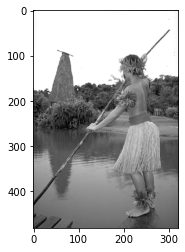

In [2]:
# Original pic
img = mpimg.imread('test002.png')
plt.imshow(img, cmap='gray')
print(img.shape)

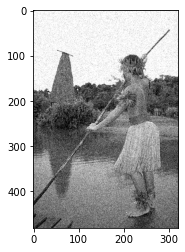

In [3]:
noisy_img = skimage.util.random_noise(img)
plt.imshow(noisy_img, cmap='gray')

Y original image;  X noisy image;  W denoise
$$L = \frac{1}{2}\lVert Y - WX \rVert^2 + \lambda |W|$$

In [4]:
X = np.array(noisy_img)
Y = np.array(img)

A = X.T
B = Y.T
n,m = A.shape
L = linalg.norm(A,2)**2
l = 4 # regularization parameter

In [5]:
print(n,' ',m)

321   481


In [6]:
W = np.random.rand(m,m)

In [7]:
def oracle(x,l):
    dif = A@x-B
    val = 0 #0.5 * linalg.norm(dif) ** 2 + l * linalg.norm(x, 1)
    grad = np.matmul(A.T, dif)

    return val,grad

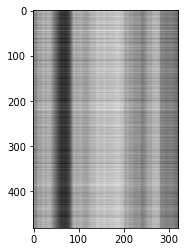

In [8]:
plt.imshow(W.T@X, cmap='gray')

In [9]:
_,_,W1 = ista(oracle,soft_thresh,W,L,l,5000)
_,_,W2 = ista2(oracle,soft_thresh,subgradient_proj,W,L,l,5000)

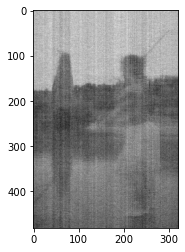

In [10]:
plt.imshow(W1.T@X, cmap='gray')

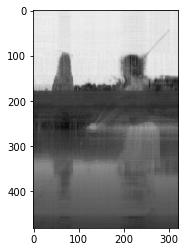

In [11]:
plt.imshow(W2.T@X, cmap='gray')